In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# OpenCV Filters: Blurring and Sharpening

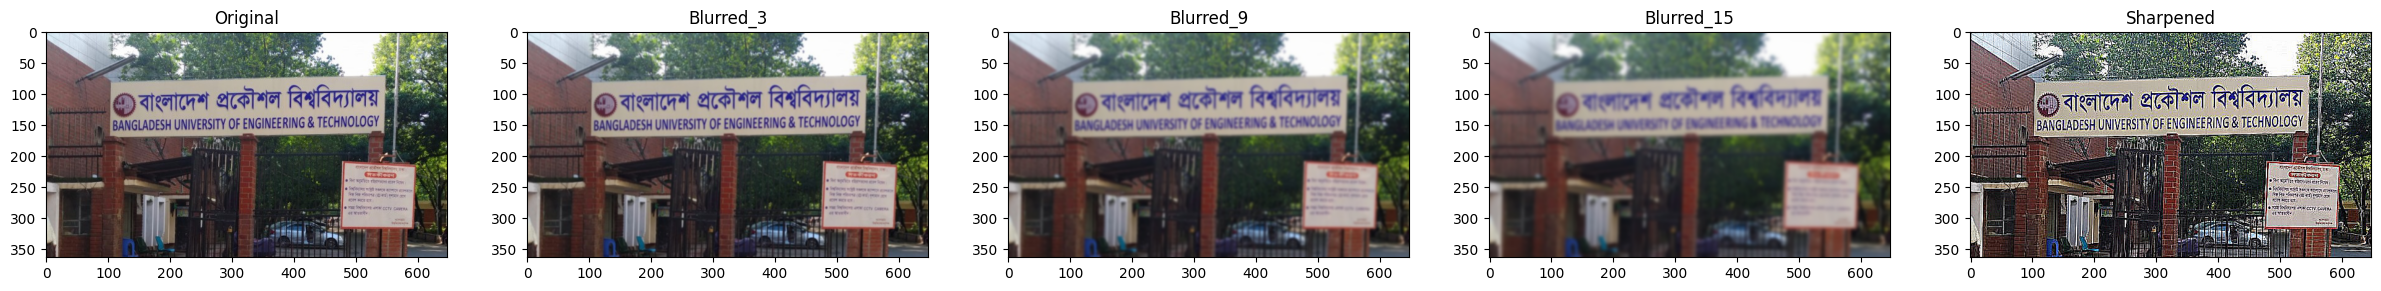

In [18]:
# Load the image
image = cv2.imread('buet10-20240401102124.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

kernelSizes = [(3, 3), (9, 9), (15, 15)]


# Blurring the Image
blurred_3 = cv2.GaussianBlur(image_rgb, kernelSizes[0], 0)
blurred_9 = cv2.GaussianBlur(image_rgb, kernelSizes[1], 0)
blurred_15 = cv2.GaussianBlur(image_rgb, kernelSizes[2], 0)


# Sharpening the Image
# kernel_1 = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
kernel_2 = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpened = cv2.filter2D(image_rgb, -1, kernel_2)
# sharpened = cv2.filter2D(sharpened, -1, kernel_2)
# Display the results
plt.figure(figsize=(30, 15))


plt.subplot(1, 5, 1)
plt.imshow(image_rgb)
plt.title('Original')

plt.subplot(1, 5, 2)
plt.imshow(blurred_3)
plt.title('Blurred_3')

plt.subplot(1, 5, 3)
plt.imshow(blurred_9)
plt.title('Blurred_9')

plt.subplot(1, 5, 4)
plt.imshow(blurred_15)
plt.title('Blurred_15')

plt.subplot(1, 5, 5)
plt.imshow(sharpened)
plt.title('Sharpened')

plt.show()

# Enhancing Images: Contrast Adjustment, Sharpening


Text(0.5, 1.0, 'Enhanced Contrast')

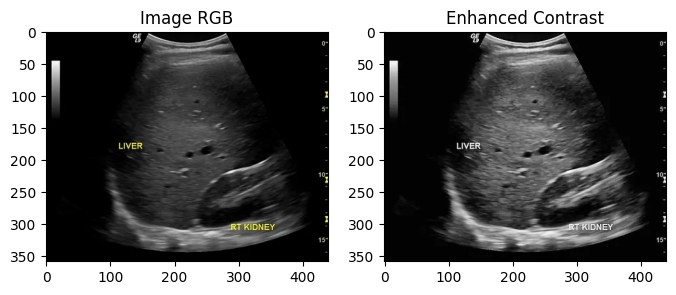

In [19]:
# CLAHE for greyscale

image = cv2.imread('Liver+and+RT+kidney.webp')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cl1 = clahe.apply(gray)

# Save the CLAHE-enhanced grayscale image
cv2.imwrite('./temp/clahe_contrast_enhanced.jpg', cl1)  # Save as a JPG file

plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Image RGB')

plt.subplot(1, 2, 2)
plt.imshow(cl1, cmap='gray')
plt.title('Enhanced Contrast')

# Apply CLAHE on RGB images.

Text(0.5, 1.0, 'CLAHE Applied to RGB Image')

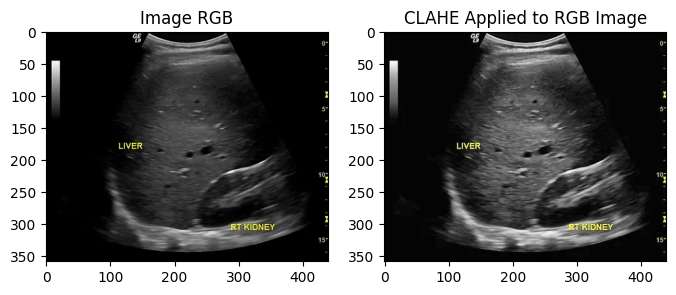

In [20]:
# Convert to LAB color space
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split the LAB image into its channels
l_channel, a_channel, b_channel = cv2.split(lab)

# Apply CLAHE to the L (lightness) channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl1 = clahe.apply(l_channel)

# Merge the CLAHE enhanced L-channel with the original a and b channels
lab_clahe = cv2.merge((cl1, a_channel, b_channel))

# Convert LAB back to RGB for display
image_clahe = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2RGB)

# Display the result
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Image RGB')

plt.subplot(1, 2, 2)
plt.imshow(image_clahe)
plt.title("CLAHE Applied to RGB Image")

# Adding Noise to image

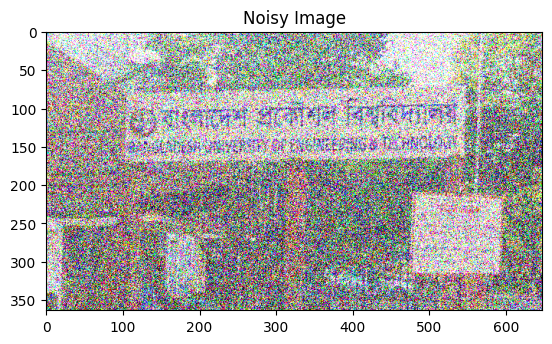

In [21]:
image = cv2.imread('buet10-20240401102124.jpg')

noise = np.random.normal(80, 150, image.shape)
noisy_image = image + noise
noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)

noisy_image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)

plt.imshow(noisy_image)
plt.title("Noisy Image")
plt.show()

# Resize

(364, 648, 3)
(30, 54, 3)


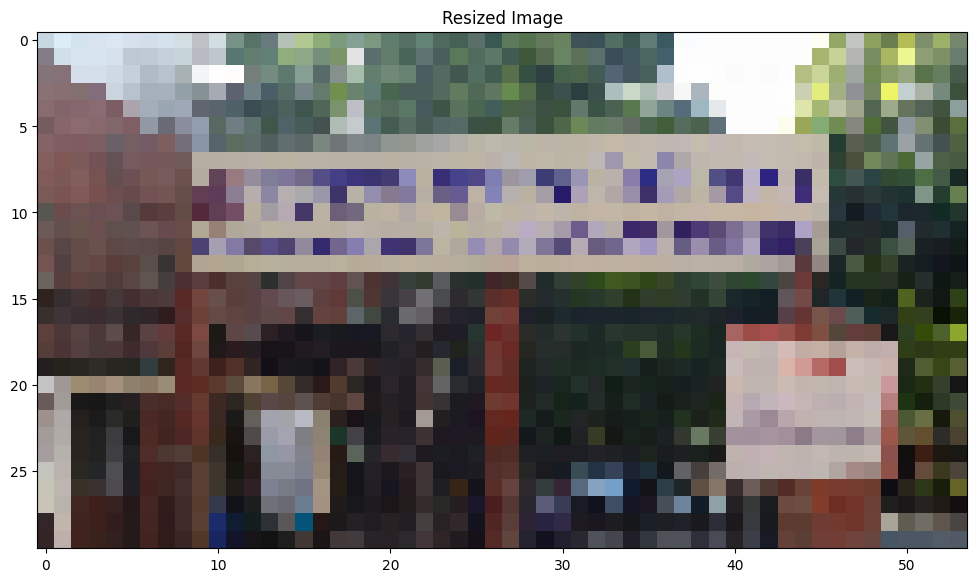

In [22]:
height, width, _ = image.shape

print(image.shape)

image_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
new_width = int(width/12)
new_height = int(height/12)
new_points = (new_width, new_height)
# new_points = (400, 400)
rescaled_img = cv2.resize(image_, new_points, interpolation= cv2.INTER_LINEAR)

print(rescaled_img.shape)

# Display the result
plt.figure(figsize=(12, 8))

plt.imshow(rescaled_img)
plt.title("Resized Image")
plt.show()

# Resize to different aspect ratio

(54, 54, 3)


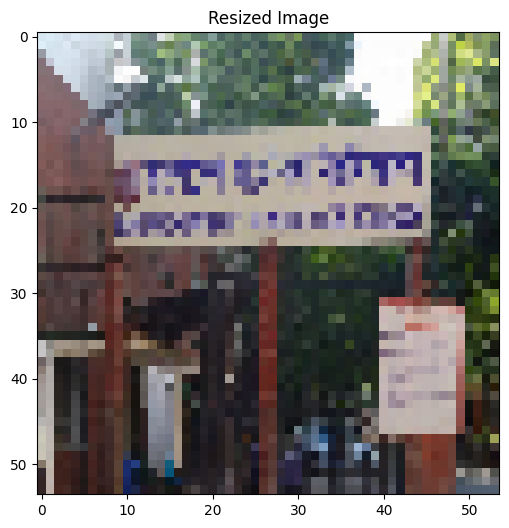

In [23]:
height, width, _ = image.shape

image_ = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
new_width = int(width/12)
new_height = int(height/12)
# new_points = (new_width, new_height)
new_points = (new_width, new_width)
rescaled_img = cv2.resize(image_, new_points, interpolation= cv2.INTER_LINEAR)

print(rescaled_img.shape)

# Display the result
plt.figure(figsize=(8, 6))

plt.imshow(rescaled_img)
plt.title("Resized Image")
plt.show()

# Crop an image

Cropping is done by slicing the image array.

- image[y1:y2, x1:x2]
    - y1:y2: Defines the height
    - x1:x2: Defines the width

(200, 98, 3)


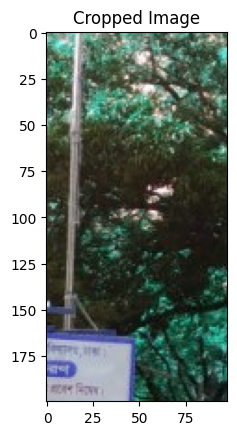

In [24]:
# Cropping an image
cropped_image = image[50:250, 550:750]

print(cropped_image.shape)

plt.imshow(cropped_image)
plt.title("Cropped Image")
plt.show()

# Image Rotation

We can rotate images by specific angles. Below are the example:

- cv2.ROTATE_90_CLOCKWISE
- cv2.ROTATE_90_COUNTERCLOCKWISE
- cv2.ROTATE_180

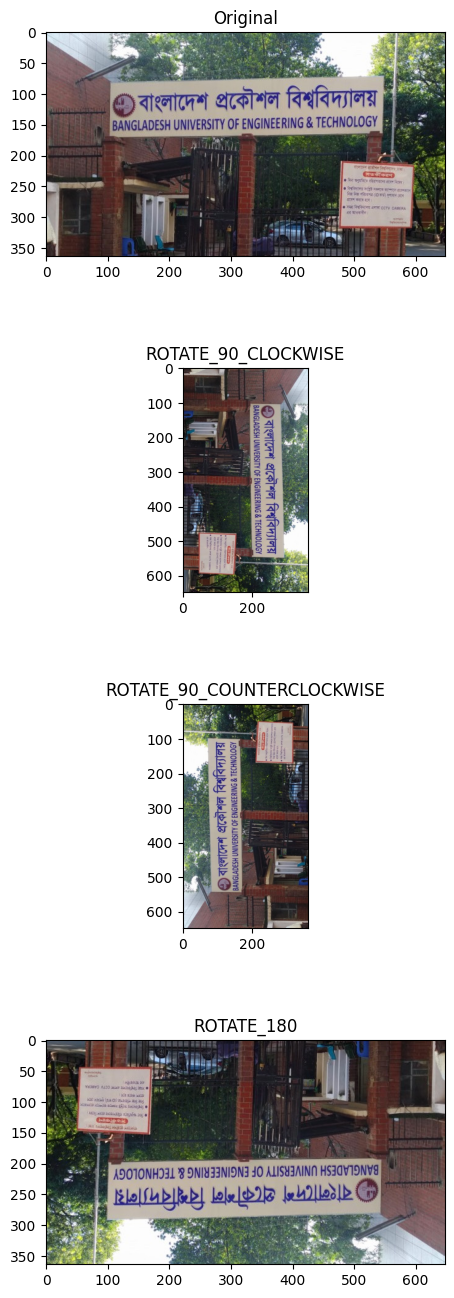

In [25]:
# Rotate

image_r = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
rotated_90c = cv2.rotate(image_r, cv2.ROTATE_90_CLOCKWISE)
rotated_90ac = cv2.rotate(image_r, cv2.ROTATE_90_COUNTERCLOCKWISE)
rotated_180 = cv2.rotate(image_r, cv2.ROTATE_180)

# Display the result
plt.figure(figsize=(20, 16))

plt.subplot(4, 1, 1)
plt.imshow(image_r)
plt.title('Original')

plt.subplot(4, 1, 2)
plt.imshow(rotated_90c)
plt.title('ROTATE_90_CLOCKWISE')

plt.subplot(4, 1, 3)
plt.imshow(rotated_90ac)
plt.title("ROTATE_90_COUNTERCLOCKWISE")

plt.subplot(4, 1, 4)
plt.imshow(rotated_180)
plt.title("ROTATE_180")

# Adjust the space between subplots
plt.subplots_adjust(hspace=0.5)  # Increase hspace for more vertical spacing

# Image Rotation 2






Height and width of original image 364 648


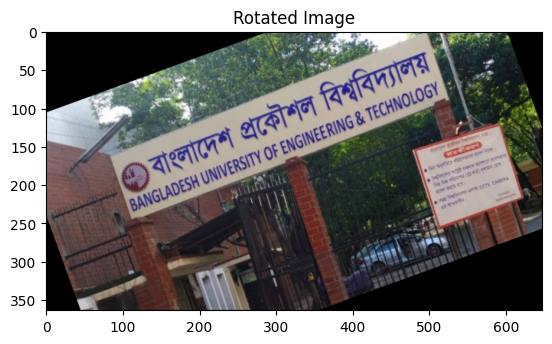

In [26]:
image = cv2.imread('buet10-20240401102124.jpg')

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

height, width = image_rgb.shape[:2]
print("Height and width of original image", height, width)

# get the coordinates of the center of the image to create the 2D rotation matrix
center = (width/2, height/2)

# using cv2.getRotationMatrix2D() to get the rotation matrix
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=20, scale=1)

# rotate the image using cv2.warpAffine
rotated_image = cv2.warpAffine(src=image_rgb, M=rotate_matrix, dsize=(width, height))

plt.imshow(rotated_image)
plt.title("Rotated Image")
plt.show()



# Flipping Image

Syntax : image = cv2.flip(img, flipCode)

- flipCode = 0: Flips the image vertically (around the x-axis).
- flipCode = 1: Flips the image horizontally (around the y-axis).
- flipCode = -1: Flips the image both vertically and horizontally (180-degree rotation).

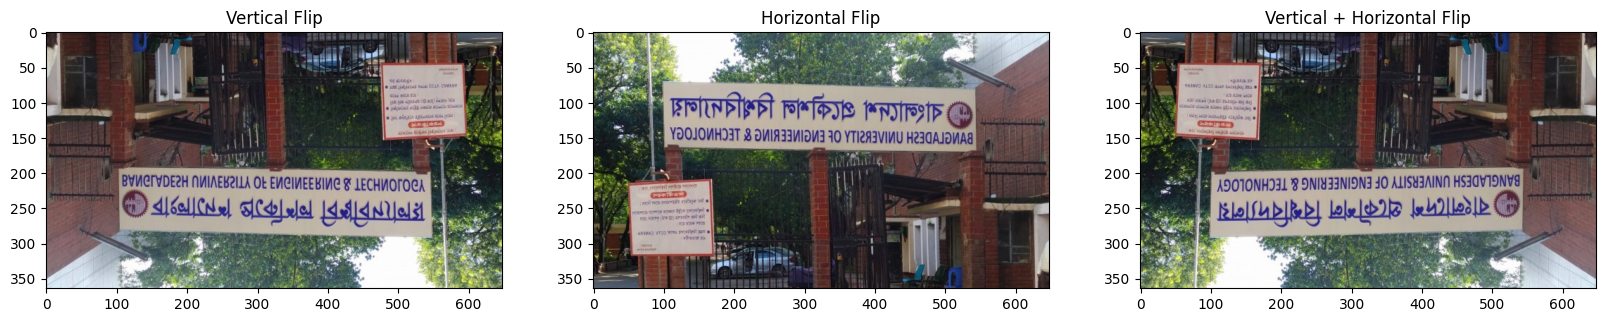

In [27]:
image_f = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Flip
flipped_v = cv2.flip(image_f, 0)  # Vertical flip

flipped_h = cv2.flip(image_f, 1)  # Horizontal flip

flipped_vh = cv2.flip(image_f, -1)  # Horizontal flip

# Display the result
plt.figure(figsize=(20, 16))

plt.subplot(1, 3, 1)
plt.imshow(flipped_v)
plt.title("Vertical Flip")

plt.subplot(1, 3, 2)
plt.imshow(flipped_h)
plt.title("Horizontal Flip")

plt.subplot(1, 3, 3)
plt.imshow(flipped_vh)
plt.title("Vertical + Horizontal Flip")

# Adjust the space between subplots
plt.subplots_adjust(hspace=0.5)  # Increase hspace for more vertical spacing